##Summer Olympics data Analysis Assignment

Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

Upload csv file

In [3]:
dataframe=pd.read_csv("summer.csv")

First 5 values 

In [4]:
dataframe.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


**Q1. In how many cities Summer Olympics is held so far?**


In [5]:
dataframe['City'].nunique()

22

In [8]:
#df['City'].unique()
data=[]
for city in dataframe['City'].unique():
  data.append([city])
  
data= pd.DataFrame(data, columns=['city'])
data.sort_values(by='city',ascending=True)

,city
6,Amsterdam
5,Antwerp
0,Athens
19,Atlanta
18,Barcelona
21,Beijing
8,Berlin
9,Helsinki
3,London
7,Los Angeles


**Q2. Which sport is having most number of Gold Medals so far? (Top 5)**

Solution Technique 1

In [ ]:
value=dataframe[dataframe['Medal']=='Gold'].Sport.value_counts()
value=pd.DataFrame(value,columns=['Sport'])
value.head()

,Sport
Aquatics,1421
Athletics,1215
Rowing,890
Gymnastics,820
Fencing,552


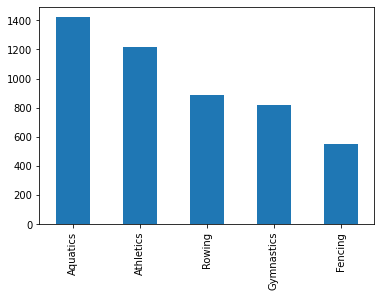

In [ ]:
value.head().plot.bar()

Solution Technique 2

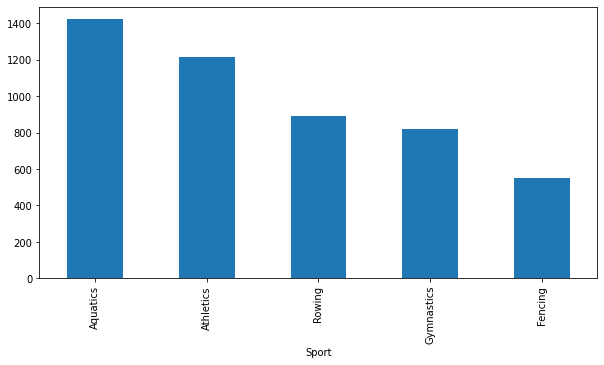

In [9]:
val = dataframe[dataframe["Medal"] == "Gold"]
val.groupby('Sport').count()["Medal"].sort_values(ascending=False).head().plot.bar(x = 'Sport', y = 'No. of Gold Medals', figsize= (10,5))

**Q3. Which sport is having most number of medals so far? (Top 5)**

Solution Technique 1

In [ ]:
value=dataframe.Sport.value_counts()
value=pd.DataFrame(value,columns=['Sport'])
value.head()

,Sport
Aquatics,4170
Athletics,3638
Rowing,2667
Gymnastics,2307
Fencing,1613


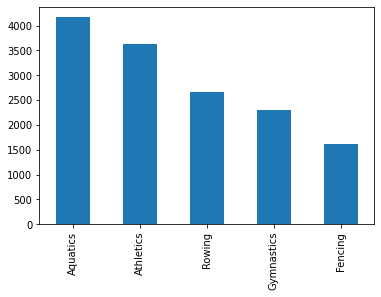

In [ ]:
value.head().plot.bar()

Solution Technique 2

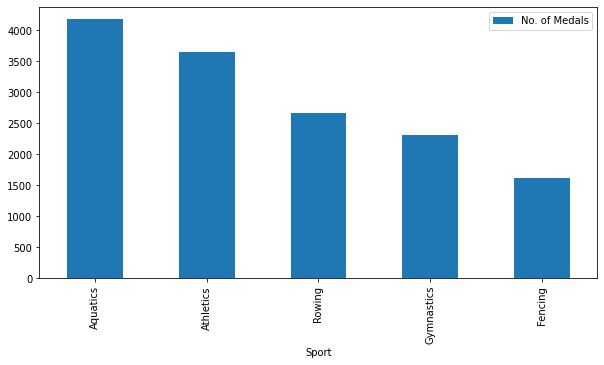

In [14]:
data=[]
for sport in dataframe['Sport'].unique():
    data.append([sport,len(dataframe[dataframe['Sport']==sport])])
    
pd.DataFrame(data,columns=['Sport','No. of Medals']).sort_values(by='No. of Medals',ascending=False).head().plot.bar(x='Sport',y='No. of Medals',figsize=(10,5))


**Q4. Which player has won most number of medals? (Top 5)**

Solution Technique 1

In [ ]:
val=dataframe.Athlete.value_counts()
val.head()

PHELPS, Michael         22
LATYNINA, Larisa        18
ANDRIANOV, Nikolay      15
MANGIAROTTI, Edoardo    13
SHAKHLIN, Boris         13
Name: Athlete, dtype: int64

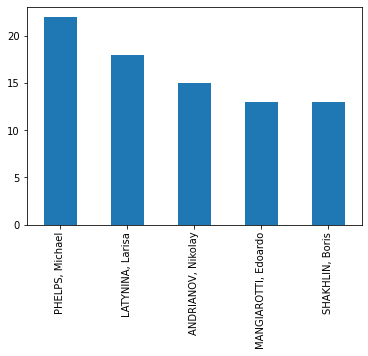

In [ ]:
val.head().plot.bar()

Solution Technique 2

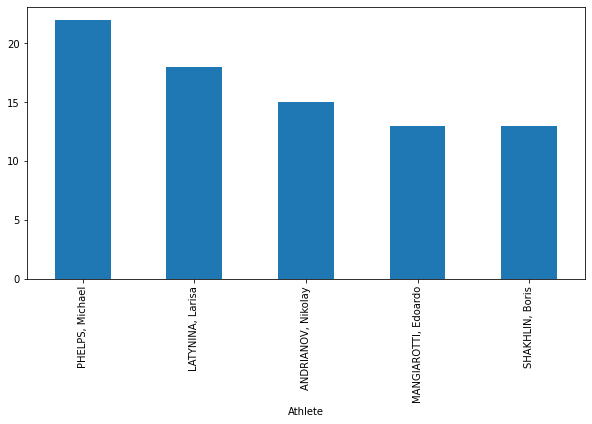

In [15]:
dataframe.groupby('Athlete').count()['Medal'].sort_values(ascending=False).head().plot.bar(figsize=(10, 5))


**Q5. Which player has won most number Gold Medals of medals? (Top 5)**

Solution Technique 1

In [ ]:
val=dataframe[dataframe.Medal=='Gold'].Athlete.value_counts()
val.head()

PHELPS, Michael     18
NURMI, Paavo         9
LEWIS, Carl          9
LATYNINA, Larisa     9
SPITZ, Mark          9
Name: Athlete, dtype: int64

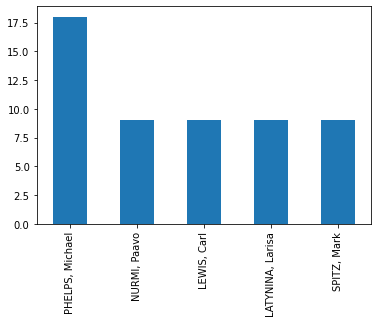

In [ ]:
val.head().plot.bar()

Solution Technique 2

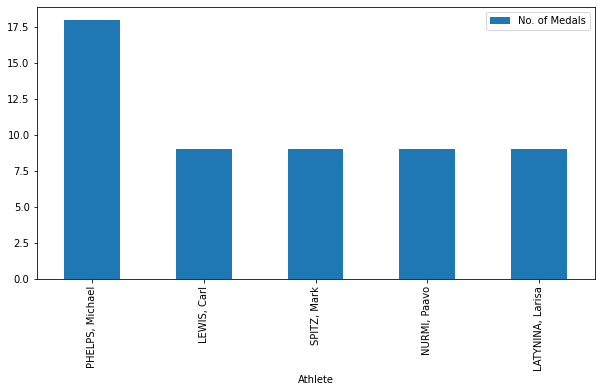

In [18]:
data = []
for athlete in dataframe['Athlete'].unique():
    data.append([athlete,len(dataframe.loc[(dataframe['Athlete']==athlete) & (dataframe['Medal']=='Gold')])])
    
pd.DataFrame(data,columns=['Athlete','No. of Medals']).sort_values(by='No. of Medals',ascending=False).head().plot.bar(x='Athlete',y='No. of Medals',figsize=(10,5))

**Q6. In which year India won first Gold Medal in Summer Olympics?**

Solution Technique 1

In [21]:
val=dataframe[dataframe.Medal=='Gold']
print("Year : ",min(val[val.Country=='IND'].Year))

Year:  1928


Solution Technique 2

In [ ]:
data = []
val= dataframe[dataframe['Country'] == 'IND']
val1 = val[val['Medal'] == 'Gold']
for year in val1['Year'].unique():
  data.append(year)
data.sort()
print("Year: ",data[0])

Year:  1928



**Q7. Which event is most popular in terms on number of players? (Top 5)**

Solution Technique 1

In [ ]:
val=dataframe['Event'].value_counts()
val.head()

Football            1497
Hockey              1422
Team Competition    1147
Basketball          1012
Handball             973
Name: Event, dtype: int64

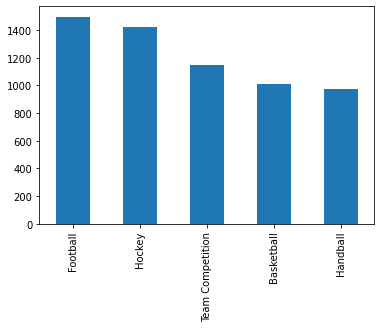

In [ ]:
val.head().plot.bar()

Solution Technique 2


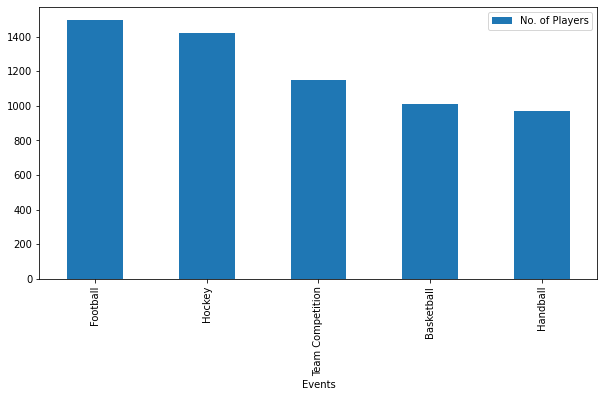

In [22]:
data = []
for event in dataframe['Event'].unique():
    data.append([event, len(dataframe[dataframe['Event']==event])])
    
pd.DataFrame(data,columns=['Events','No. of Players']).sort_values(by='No. of Players',ascending=False).head().plot.bar(x='Events',y='No. of Players',figsize=(10,5))

**Q8. Which sport is having most female Gold Medalists? (Top 5)**

Solution Technique 1

In [ ]:
val=dataframe[dataframe.Medal=='Gold']
value=val[val.Gender=='Women'].Sport.value_counts()
value.head()

Aquatics      589
Athletics     389
Gymnastics    268
Rowing        217
Volleyball    166
Name: Sport, dtype: int64

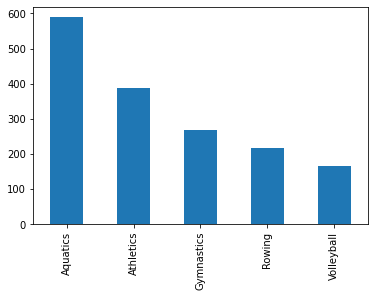

In [ ]:
value.head().plot.bar()

Solution Technique 2

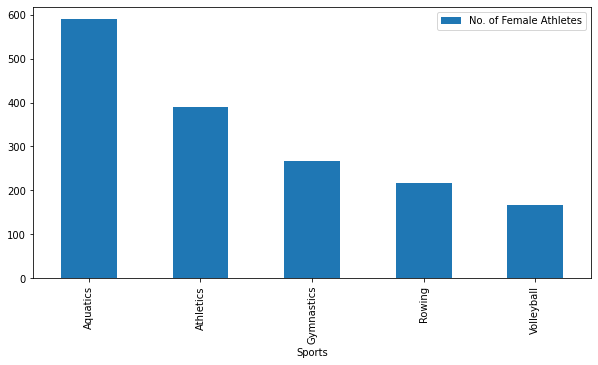

In [23]:
data = []
for sport in dataframe['Sport'].unique():
    data.append([sport, len(dataframe.loc[(dataframe['Sport']==sport) & (dataframe['Gender']=='Women') & (dataframe['Medal']=='Gold')])])
    
pd.DataFrame(data,columns=['Sports','No. of Female Athletes']).sort_values(by='No. of Female Athletes', ascending=False).head().plot.bar(x='Sports',y='No. of Female Athletes',figsize=(10,5))